# Задача регрессии


## 1. Выбор начальных условий

### Загрузка датасета

Для задачи регрессии мною был выбран датасет с Kaggle для оценки возраста краба на основе физических характеристик.

Ниже приведено подробное описание каждого столбца в наборе данных:

- **Sex** - пол краба(мужской, женский и неопределенный)
- **Length** - длина краба (в футах; 1 фут = 30,48 см)
- **Diameter** - диаметр краба (в футах; 1 фут = 30,48 см)
- **Height** - высота краба (в футах; 1 фут = 30,48 см)
- **Weight** - вес краба (в унциях; 1 фунт = 16 унций)
- **Shucked Weight** - вес без скорлупы (в унциях; 1 фунт = 16 унций)
- **Viscera Weight** - это вес, который охватывает органы брюшной полости глубоко внутри тела (в унциях; 1 фунт = 16 унций)
- **Shell Weight** - вес ракушки (в унциях; 1 фунт = 16 унций)
- **Age** - возраст краба (в месяцах)

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/sidhus/crab-age-prediction/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: cojihbilliko
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sidhus/crab-age-prediction


100%|██████████| 81.2k/81.2k [00:00<00:00, 59.5MB/s]

In [ ]:
import pandas as pd

raw_data = pd.read_csv('crab-age-prediction/CrabAgePrediction.csv')
raw_data.head(10)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
7,M,1.3250,1.0125,0.3750,23.572609,9.979024,5.301356,7.158249,10
8,I,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
9,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7


### Метрики

В качестве метрик в задаче регрессии использовались MSE и r2-score:
- MSE(среднеквадратичная ошибка) из-за возведения в квадрат сильнее штрафует ошибки. Подходит, если большие отклонения критически важны.
- r2-score(коэффициент детерминации) удобен для оценки общей точности модели.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [ ]:
def print_evaluation(y_test, y_pred):
    print("MSE error:", mean_squared_error(y_test, y_pred))
    print("R^2 score:", r2_score(y_test, y_pred))

## 2. Создание бейзлайна и оценка качества

Разделим исходные данные на обучающую и тестовую выборки

In [ ]:
raw_data['Sex'] = raw_data['Sex'].replace('I', 0)
raw_data['Sex'] = raw_data['Sex'].replace('M', 1)
raw_data['Sex'] = raw_data['Sex'].replace('F', 2)
raw_x = raw_data.drop('Age', axis=1)
raw_y = raw_data['Age']

raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x, raw_y, test_size=0.2, random_state=42)

<ipython-input-6-40985c65c1cc>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data['Sex'] = raw_data['Sex'].replace('F', 2)


### Обучение моделей
#### KNN

In [ ]:
modelKNN = KNeighborsRegressor(n_neighbors=3)
modelKNN.fit(raw_x_train,raw_y_train)

raw_y_pred = modelKNN.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred)

MSE error: 4.958493795464271
R^2 score: 0.4839986779650126


#### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
modelLogisticRegression = LogisticRegression(random_state=42, max_iter=100000)
modelLogisticRegression.fit(raw_x_train,raw_y_train)

raw_y_pred2 = modelLogisticRegression.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred2)

MSE error: 5.735558408215661
R^2 score: 0.40313412836063434


#### Линейная регрессия

In [ ]:
modelLinearRegression = LinearRegression()
modelLinearRegression.fit(raw_x_train,raw_y_train)

raw_y_pred3 = modelLinearRegression.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred3)

MSE error: 4.648710266528381
R^2 score: 0.5162360300862965


#### Решающее дерево

In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelDecisionTree = DecisionTreeRegressor(random_state=42)
modelDecisionTree.fit(raw_x_train, raw_y_train)

raw_y_pred4 = modelDecisionTree.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred4)

MSE error: 8.436456996148909
R^2 score: 0.12206747797360984


#### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelRandomForest = RandomForestRegressor(n_estimators=100, random_state=42)
modelRandomForest.fit(raw_x_train, raw_y_train)

raw_y_pred5 = modelRandomForest.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred5)

MSE error: 4.445734146341463
R^2 score: 0.5373585625887649


#### Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

modelGradientBoosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelGradientBoosting.fit(raw_x_train, raw_y_train)

raw_y_pred6 = modelGradientBoosting.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred6)

MSE error: 4.416814931047821
R^2 score: 0.540368015446684


## 3. Улучшение бейзлайна

Выполним препроцессинг данных, визуализируем некоторую информацию и исследуем датасет

In [ ]:
df = pd.read_csv('crab-age-prediction/CrabAgePrediction.csv')
df['Sex'] = df['Sex'].replace('I', 0)
df['Sex'] = df['Sex'].replace('M', 1)
df['Sex'] = df['Sex'].replace('F', 2)

df.head(10)

<ipython-input-18-b8069059167d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace('F', 2)


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,2,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,0,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,2,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,2,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,2,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
7,1,1.3250,1.0125,0.3750,23.572609,9.979024,5.301356,7.158249,10
8,0,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
9,0,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   int64  
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 273.9 KB


In [ ]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0
Age,0


In [ ]:
df['Age'].value_counts()

,count
Age,
9,640
10,598
8,520
11,459
7,357
12,248
6,241
13,195
14,122


Удалим из набора данных информацию о крабах, возраст которых представлен в единственном экземпляре

In [ ]:
df_sorted = df.sort_values(by='Age')
df_sorted

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1330,0,0.1875,0.1375,0.0250,0.056699,0.028349,0.014175,0.042524,1
1134,0,0.3750,0.2500,0.0625,0.425243,0.127573,0.113398,0.141747,2
2778,0,0.4000,0.2750,0.0625,0.510291,0.184272,0.155922,0.141747,3
3443,0,0.4750,0.3500,0.0750,0.893009,0.354369,0.141747,0.297670,3
599,0,0.4875,0.3750,0.1125,1.063106,0.510291,0.170097,0.311845,3
...,...,...,...,...,...,...,...,...,...
2423,2,1.6125,1.2250,0.5375,39.859397,12.091062,6.477861,14.458245,25
89,1,1.5000,1.2375,0.4875,29.979596,10.886208,5.386405,10.631063,26
3069,1,1.6625,1.3375,0.5625,61.901133,21.361348,11.084654,25.089308,27
3522,2,1.3750,1.1625,0.4500,34.373769,9.199413,5.811648,14.883487,27


In [ ]:
df = df_sorted[2:-5]
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
2778,0,0.4000,0.2750,0.0625,0.510291,0.184272,0.155922,0.141747,3
3443,0,0.4750,0.3500,0.0750,0.893009,0.354369,0.141747,0.297670,3
599,0,0.4875,0.3750,0.1125,1.063106,0.510291,0.170097,0.311845,3
2844,0,0.5125,0.3875,0.1125,1.403300,0.666213,0.311845,0.396893,3
753,0,0.2750,0.2250,0.0750,0.226796,0.070874,0.056699,0.085048,3
...,...,...,...,...,...,...,...,...,...
3088,1,1.5250,1.2250,0.3750,31.269499,12.048538,5.740774,10.205820,23
501,2,2.0000,1.5750,0.4875,71.610837,26.450084,16.726205,17.576690,23
2344,2,1.2250,0.9625,0.3750,22.296882,6.832230,3.968930,6.803880,23
3307,1,1.7250,1.3500,0.4625,45.912015,15.110283,10.007373,15.733973,24


<Axes: xlabel='Age'>

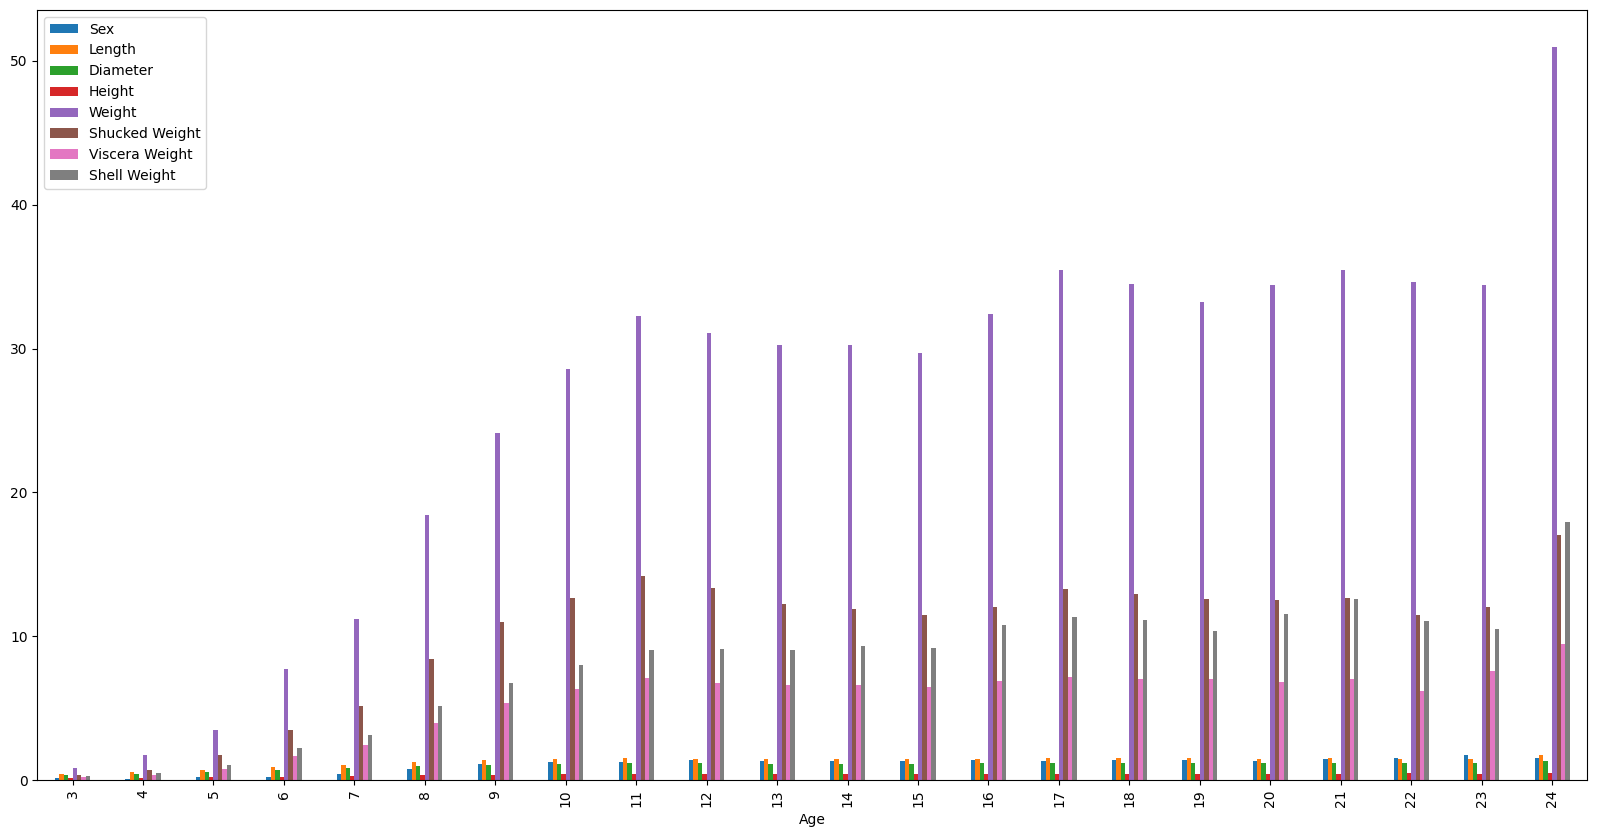

In [ ]:
ave_qu = df.groupby("Age").mean()
ave_qu.plot(kind="bar",figsize=(20,10))

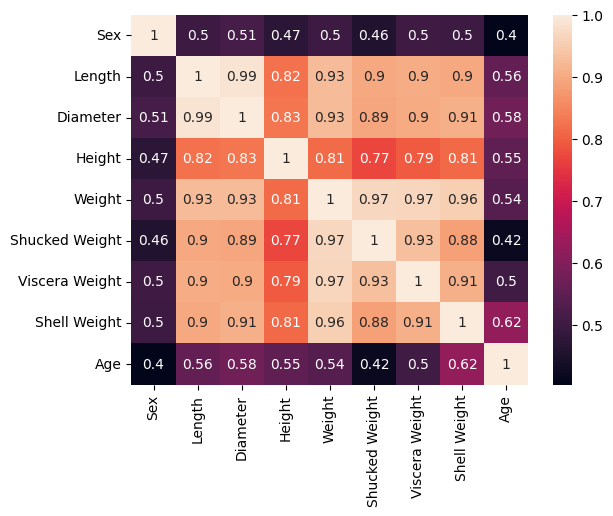

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(),annot=True);

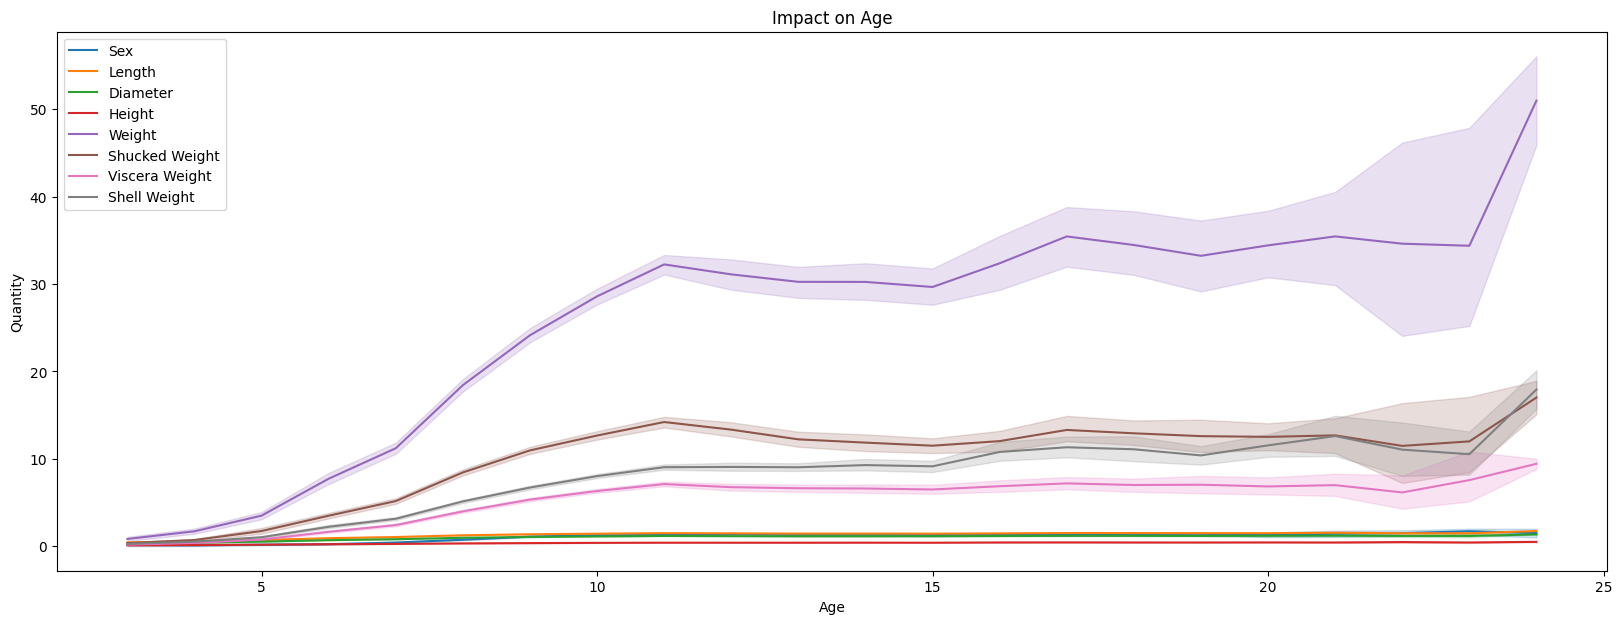

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="Age",y="Sex",label="Sex")
sns.lineplot(data=df, x="Age",y="Length",label="Length")
sns.lineplot(data=df, x="Age",y="Diameter",label="Diameter")
sns.lineplot(data=df, x="Age",y="Height",label="Height")
sns.lineplot(data=df, x="Age",y="Weight",label="Weight")
sns.lineplot(data=df, x="Age",y="Shucked Weight",label="Shucked Weight")
sns.lineplot(data=df, x="Age",y="Viscera Weight",label="Viscera Weight")
sns.lineplot(data=df, x="Age",y="Shell Weight",label="Shell Weight")
plt.ylabel("Quantity")
plt.title("Impact on Age")
plt.legend()
plt.show()

После визуализации становится ясно, что больше всего на возраст краба влияет вес самого краба и его составных частей соответсвенно.

Выполним нормализацию данных: приведём все признаки к одному масштабу. Это должно позволить модели лучше обучаться.

In [ ]:
from sklearn.preprocessing import StandardScaler

x = df.drop('Age', axis=1)
y = df['Age']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=420, stratify=y)

### Обучение моделей с улучшенным бейзлайном

Осуществим подбор гиперпараметров GridSearchCV для получения лучших результатов

#### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

knn_param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}
knn_regressor = KNeighborsRegressor()
grid_search_knn = GridSearchCV(
    estimator=knn_regressor,
    param_grid=knn_param_grid,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search_knn.fit(x_train, y_train)
optimal_knn_model = grid_search_knn.best_estimator_
predictions = optimal_knn_model.predict(x_test)

print("Model: KNeighborsRegressor\n")
print(f"Best params: {grid_search_knn.best_params_}")
print_evaluation(y_test, predictions)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model: KNeighborsRegressor

Best params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
MSE error: 4.918318269817282
R^2 score: 0.5011286509436337


#### Логистическая регрессия

In [ ]:
param_grid_logistic = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear", "saga"]
}
logistic_model = LogisticRegression(max_iter=1000)
grid_search_logistic = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid_logistic,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search_logistic.fit(x_train, y_train)
best_logistic_model = grid_search_logistic.best_estimator_
predictions = best_logistic_model.predict(x_test)

print("Model: LogisticRegression")
print(f"Best params: {grid_search_logistic.best_params_}")
print_evaluation(y_test, predictions)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *a

Model: LogisticRegression
Best params: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
MSE error: 5.687660668380463
R^2 score: 0.42309326177152673


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Линейная регрессия

Импортируем линейную Ridge для того, чтобы подобрать такое оптимальные значения коэффициента альфа, которое минимизируют функцию потерь.

In [ ]:
from sklearn.linear_model import Ridge

param_grid_ridge = {
    "alpha": [100, 50, 20, 10, 5, 2, 1]
}
ridge_model = Ridge()
grid_ridge = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid_ridge,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_ridge.fit(x_train, y_train)
best_ridge = grid_ridge.best_estimator_
y_pred = best_ridge.predict(x_test)

print("Model: Ridge")
print(f"Best params: {grid_ridge.best_params_}")
print_evaluation(y_test, y_pred)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Model: Ridge
Best params: {'alpha': 1}
MSE error: 4.695785979301134
R^2 score: 0.523700387437319


#### Решающее дерево

In [ ]:
param_grid_tree = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
decision_tree = DecisionTreeRegressor(random_state=42)
grid_tree = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid_tree,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_tree.fit(x_train, y_train)
best_tree = grid_tree.best_estimator_
y_pred = best_tree.predict(x_test)

print("Model: DecisionTreeRegressor")
print(f"Best params: {grid_tree.best_params_}")
print_evaluation(y_test, y_pred)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Model: DecisionTreeRegressor
Best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
MSE error: 5.513764936365677
R^2 score: 0.440731729570111


#### Случайный лес

In [ ]:
param_grid_forest = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
random_forest = RandomForestRegressor(random_state=42)
grid_forest = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid_forest,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_forest.fit(x_train, y_train)
best_random_forest = grid_forest.best_estimator_
y_pred = best_random_forest.predict(x_test)

print("Model: RandomForestRegressor")
print(f"Best params: {grid_forest.best_params_}")
print_evaluation(y_test, y_pred)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: RandomForestRegressor
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
MSE error: 4.300036523364672
R^2 score: 0.5638417638469998


#### Градиентный бустинг

In [ ]:
param_grid_gradient_boosting = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
gradient_boosting = GradientBoostingRegressor(random_state=42)
grid_gradient_boosting = GridSearchCV(
    estimator=gradient_boosting,
    param_grid=param_grid_gradient_boosting,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_gradient_boosting.fit(x_train, y_train)
best_gradient_boosting = grid_gradient_boosting.best_estimator_
y_pred = best_gradient_boosting.predict(x_test)

print("Model: GradientBoostingRegressor")
print(f"Best params: {grid_gradient_boosting.best_params_}")
print_evaluation(y_test, y_pred)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: GradientBoostingRegressor
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
MSE error: 4.575860012490717
R^2 score: 0.5358646325242526


## Имплементация алгоритма машинного обучения
### Обучение моделей самостоятельной реализации с исходным бейзлайном
#### KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class MyKNN:
    def __init__(self, num_neighbors=3):
        self.num_neighbors = num_neighbors

    def fit(self, features, labels):
        self.x_train = np.array(features)
        self.y_train = np.array(labels)

    def predict(self, test_features):
        predictions = []
        features = np.array(test_features, dtype=float)
        for feature in features:
            distances = np.linalg.norm(self.x_train - feature, axis=1)
            nearest_indices = np.argsort(distances)[:self.num_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_labels).argmax())
        return np.array(predictions)

In [ ]:
modelMyKNN = MyKNN(num_neighbors=3)
modelMyKNN.fit(raw_x_train, raw_y_train)
my_raw_y_pred = modelMyKNN.predict(raw_x_test)
print_evaluation(raw_y_test, my_raw_y_pred)

MSE error: 6.839537869062901
R^2 score: 0.2882494708830482


#### Логистическая регрессия

In [ ]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(features, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(features.T, (y_predicted - labels))
            db = (1 / n_samples) * np.sum(y_predicted - labels)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, test_features):
        linear_model = np.dot(test_features, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return y_predicted

In [ ]:
modelMyLogisticRegression = MyLogisticRegression()
modelMyLogisticRegression.fit(raw_x_train, raw_y_train)
my_raw_y_pred2 = modelMyLogisticRegression.predict(raw_x_test)
print_evaluation(raw_y_test, my_raw_y_pred2)

MSE error: 86.77406931964056
R^2 score: -8.030067664549284


#### Линейная регрессия

In [ ]:
class MyLinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.weights

In [ ]:
modelMyLinearRegression = MyLinearRegression()
modelMyLinearRegression.fit(raw_x_train, raw_y_train)
my_raw_y_pred3 = modelMyLinearRegression.predict(raw_x_test)
my_raw_y_pred3
print_evaluation(raw_y_test, my_raw_y_pred3)

MSE error: 4.6487102665280515
R^2 score: 0.5162360300863308


#### Решающее дерево

In [ ]:
class MyDecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        def build_tree(X, y, depth):
            if len(y) < self.min_samples_split or depth == self.max_depth:
                return np.mean(y)

            best_split = None
            best_mse = float("inf")
            for feature in range(X.shape[1]):
                for threshold in np.unique(X[:, feature]):
                    left = y[X[:, feature] <= threshold]
                    right = y[X[:, feature] > threshold]

                    mse = (
                        len(left) * np.var(left) +
                        len(right) * np.var(right)
                    ) / len(y)

                    if mse < best_mse:
                        best_mse = mse
                        best_split = (feature, threshold)

            if best_split is None:
                return np.mean(y)

            feature, threshold = best_split
            left_indices = X[:, feature] <= threshold
            right_indices = X[:, feature] > threshold

            return {
                "feature": feature,
                "threshold": threshold,
                "left": build_tree(X[left_indices], y[left_indices], depth + 1),
                "right": build_tree(X[right_indices], y[right_indices], depth + 1),
            }

        self.tree = build_tree(X, y, 0)

    def predict(self, X):
        def traverse(x, node):
            if not isinstance(node, dict):
                return node

            if x[node["feature"]] <= node["threshold"]:
                return traverse(x, node["left"])
            else:
                return traverse(x, node["right"])

        return np.array([traverse(x, self.tree) for x in X])

In [ ]:
modelMyDecisionTree = MyDecisionTree()
modelMyDecisionTree.fit(scaler.fit_transform(raw_x_train), raw_y_train)
my_raw_y_pred4 = modelMyDecisionTree.predict(scaler.fit_transform(raw_x_test))
print_evaluation(raw_y_test, my_raw_y_pred4)

MSE error: 5.600070306568227
R^2 score: 0.4172335792128341


#### Случайный лес

In [ ]:
class MyRandomForest:
    def __init__(self, n_trees=10, max_depth=5, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = int(len(X) * self.sample_size)
        idxs = np.random.choice(len(X), size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = MyDecisionTree(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)


In [ ]:
modelMyRandomForest = MyRandomForest()
modelMyRandomForest.fit(raw_x_train.values, raw_y_train.values)
my_raw_y_pred5 = modelMyRandomForest.predict(raw_x_test.values)
print_evaluation(raw_y_test, my_raw_y_pred5)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


MSE error: 4.709267491845436
R^2 score: 0.5099341953737162


#### Градиентный бустинг

In [ ]:
class MyGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = MyDecisionTree(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)

        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        return y_pred

In [ ]:
modelMyGradientBoosting = MyGradientBoosting()
modelMyGradientBoosting.fit(raw_x_train.values, raw_y_train.values)
my_raw_y_pred6 = modelMyGradientBoosting.predict(raw_x_test.values)
print_evaluation(raw_y_test, my_raw_y_pred6)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


MSE error: 4.4084860560015775
R^2 score: 0.5412347525471433


### Обучение моделей самостоятельной реализации с улучшенным бейзлайном

Воспользуемся гиперпараметрами, найденными в результате алгоритма GridSearchCV

#### KNN

In [ ]:
MyKNN = MyKNN(num_neighbors=9)
MyKNN.fit(x_train, y_train)
my_y_pred = MyKNN.predict(x_test)
print_evaluation(y_test, my_y_pred)

MSE error: 7.057840616966581
R^2 score: 0.2841141469802154


#### Логистическая регрессия

In [ ]:
MyLogisticRegression = MyLogisticRegression()
MyLogisticRegression.fit(x_train, y_train)
my_y_pred2 = MyLogisticRegression.predict(x_test)
print_evaluation(y_test, my_y_pred2)

<ipython-input-24-f2552ffd0f48>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


MSE error: 92.40359730604821
R^2 score: -8.37261574319428


#### Линейная регрессия

In [ ]:
MyLinearRegression = MyLinearRegression()
MyLinearRegression.fit(x_train, y_train)
my_y_pred3 = MyLinearRegression.predict(x_test)
print_evaluation(y_test, my_y_pred3)

MSE error: 4.7056255224074475
R^2 score: 0.5227023499224089


#### Решающее дерево

In [ ]:
MyDecisionTree = MyDecisionTree(max_depth=10, min_samples_split=4)
MyDecisionTree.fit(x_train, y_train)
my_y_pred4 = MyDecisionTree.predict(x_test)
print_evaluation(y_test, my_y_pred4)

MSE error: 6.935165301377481
R^2 score: 0.2965572620505469


#### Случайный лес

In [ ]:
MyRandomForest = MyRandomForest(n_trees=10, max_depth=10, sample_size=0.8)
MyRandomForest.fit(x_train, y_train.values)
my_y_pred5 = MyRandomForest.predict(x_test)
print_evaluation(y_test, my_y_pred5)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


MSE error: 4.885521014442294
R^2 score: 0.5044553187468691


####  Градиентный бустинг

In [ ]:
MyGradientBoosting = MyGradientBoosting(max_depth=10, n_estimators=50)
MyGradientBoosting.fit(x_train, y_train)
my_y_pred6 = MyGradientBoosting.predict(x_test)
print_evaluation(y_test, my_y_pred6)

MSE error: 4.557284284157547
R^2 score: 0.5377487925449944


## Выводы

В результате выполнения данного задания мне удалось улучшить бейзлайн почти для всех стандартных моделей из из библиотеки scikit-learn. Самостоятельная имплементация работает чуть хуже почти во всех случаях, возможно необходимо было ещё оптимизировать код моделей или выбрать другие метрики для сравнения, в которых ошибки не так критичны.